In [ ]:
"""
You can add your own functions here according to your decision tree implementation.
There is no restriction on following the below template, these fucntions are here to simply help you.
"""

import pandas as pd
import math

def one_hot_encoding(X: pd.DataFrame) -> pd.DataFrame:
    """
    Function to perform one hot encoding on the input data
    """

    pass

def check_ifreal(y: pd.Series) -> bool:
    """
    Function to check if the given series has real or discrete values
    """
    #we assume that integers wont be used to give categorical data and even if
    #actually used, would be given as strings

    if(y.dtype=='float64'):
      return True
    else:
      return False




def entropy(Y: pd.Series) -> float:
    """
    Function to calculate the entropy
    """

    if len(Y) == 0:
        return 0.0
    uniq_labels= Y.unique()
    tot=len(Y)
    entropy=0
    for i in uniq_labels:
      n=Y[Y==i].count()
      p_n=n/tot
      entropy+=-(p_n)*(math.log(p_n,2))

    return entropy





def gini_index(Y: pd.Series) -> float:
    """
    Function to calculate the gini index
    """

    if len(Y) == 0:
        return 0.0
    uniq_labels= Y.unique()
    tot=len(Y)
    g_t=0
    for i in uniq_labels:
      n=Y[Y==i].count()
      p_n=n/tot
      g_t+=(p_n)**2

    return (1-g_t)

#a func for MSE

def mse_feat(Y: pd.Series) -> float:
    """
      basic- fxn to give mse
    """

    if len(Y) == 0:
        return 0.0

    if check_ifreal(Y):

      mean_y=Y.mean()
      mse_sum=0
      for i in Y:
        mse_sum+=(mean_y-i)**2
      mse=mse_sum/(len(Y))
      return mse
    else:
      print("NOT A REAL VALUED FEATURE ;;")
      return



def information_gain(Y: pd.Series, attr: pd.Series, criterion: str) -> float:
    """
    Function to calculate the information gain using criterion (entropy, gini index or MSE)
    Okay, so Y is the output column here and attr is the feature we're trying to check the info gain on

    """

    if criterion in ["entropy","information_gain"]:
        base_info=entropy(Y)
    elif criterion in["gini","gini_index"]:
        base_info=gini_index(Y)
    elif criterion in ["MSE","mse"]:
        base_info=mse_feat(Y)

    # print("You have not chosen a valid criterion :<")

    #weighted impurities

    split_info=0
    tot_len= len(Y)
    best_thresh=None
    if check_ifreal(attr)==False:

      for i in attr.unique():
        attr_sub=Y[attr==i]
        w_attr=len(attr_sub)/tot_len

        #adding for each attribute
        if criterion =="entropy":
          split_info+=w_attr*entropy(attr_sub)
        elif criterion =="gini":
          split_info+=w_attr*gini_index(attr_sub)
        elif criterion =="MSE":
          split_info+=w_attr*mse_feat(attr_sub)


      return base_info-split_info,None

    else:
      best_thresh_gain=-1
      #real features need to be sorted to see their natural trends
      sorted_features=attr.sort_values().values
      threshold=[]
      for i in range(len(sorted_features)-1):
        threshold.append((sorted_features[i+1]+sorted_features[i])/2)

      for t in threshold:
        #check for each threshold the info gain using criteria
        left_side=attr<=t
        right_side=attr>t

        l_sum=left_side.sum()
        r_sum=right_side.sum()


        w_l=l_sum/tot_len
        w_r=r_sum/tot_len

        if criterion =="entropy":
          split_info=w_l*entropy(Y[left_side])+w_r*entropy(Y[right_side])
        elif criterion =="gini":
          split_info=w_l*gini_index(Y[left_side])+w_r*gini_index(Y[right_side])
        elif criterion=="MSE":
          split_info=w_l*mse_feat(Y[left_side])+w_r*mse_feat(Y[right_side])

        curr_gain=base_info-split_info
        if curr_gain>best_thresh_gain:
          best_thresh_gain=curr_gain
          best_thresh=t

      return best_thresh_gain,best_thresh


def opt_split_attribute(X: pd.DataFrame, y: pd.Series, criterion, features: pd.Series):
    """
    Function to find the optimal attribute to split about.
    If needed you can split this function into 2, one for discrete and one for real valued features.
    You can also change the parameters of this function according to your implementation.

    features: pd.Series is a list of all the attributes we have to split upon

    return: attribute to split upon
    """

    # According to wheather the features are real or discrete valued and the criterion, find the attribute from the features series with the maximum information gain (entropy or varinace based on the type of output) or minimum gini index (discrete output).

    best_gain=(-1)
    best_attr=None
    best_thresh=None
    for feature in features:
      #each featuere's info gain is checked
      if check_ifreal(X[feature])==False:
        feat_info_gain,best_thresh=information_gain(y,X[feature],criterion)
        if feat_info_gain>best_gain:
          best_gain=feat_info_gain
          best_attr=feature
      else:
        feat_info_gain,best_thresh=information_gain(y,X[feature],criterion)
        if feat_info_gain>best_gain:
          best_gain=feat_info_gain
          best_attr=feature
          best_thresh=best_thresh

    if check_ifreal(X[best_attr]) == False:
      return best_attr
    else:
      return best_attr, best_thresh if best_thresh is not None else None

    #the best split given: either Real with its threshold or Discrete ones






def split_data(X: pd.DataFrame, y: pd.Series, attribute, value):
    """
    Funtion to split the data according to an attribute.
    If needed you can split this function into 2, one for discrete and one for real valued features.
    You can also change the parameters of this function according to your implementation.

    attribute: attribute/feature to split upon
    value: value of that attribute to split upon

    return: splitted data(Input and output)
    """

    #here value can either act as the disc attr in a feature or the best threshold in a feature
    if check_ifreal(X[attribute])==False:
       return [X[X[attribute]==value], y[X[attribute]==value]] # A DISC SPLIT =>the split steps can be done again on this df
    else:
        #both left and right sides
        return [X[X[attribute]<=value],y[X[attribute]<=value] ,X[X[attribute]>value], y[X[attribute]>value]]   #A REAL SPLIT

    # Split the data based on a particular value! of a particular attribute!. You may use masking as a tool to split the data.



# def give_the_best_split_data(X: pd.DataFrame, y: pd.Series, attribute, value):
#     opt_split_attribute(X,y,criterion)

In [ ]:
y1=[[1,2],[2,1],[2,4]]
y2=[['aa','ba'],['aa','lmao']]
df1=pd.DataFrame(y1,columns=['yo','no'])
df2=pd.DataFrame(y2,columns=['yo','no'])

In [ ]:
df1

,yo,no
0,1,2
1,2,1
2,2,4


In [ ]:
df2

,yo,no
0,aa,ba
1,aa,lmao


In [ ]:
check_ifreal(df1['no'])

False

In [ ]:
check_ifreal(df2['no'])

False

In [ ]:
y['no']

NameError: name 'y' is not defined

testing entropy

In [ ]:
entropy(df2['no'])

np.float64(1.0)

In [ ]:
gini_index(df2['no'])

np.float64(0.5)

In [ ]:
print(mse_feat(df1['yo']))

NOT A REAL VALUED FEATURE ;;
None


In [ ]:
information_gain(df2['no'],criterion="entropy")

TypeError: information_gain() missing 1 required positional argument: 'attr'

BASE_PY

In [ ]:
"""
The current code given is for the Assignment 1.
You will be expected to use this to make trees for:
> discrete input, discrete output
> real input, real output
> real input, discrete output
> discrete input, real output
"""
from dataclasses import dataclass
from typing import Literal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from utils import *

np.random.seed(42)


@dataclass

class Node:
    def __init__(self):
        self.attr = None
        self.pred = None
        self.children = {}
        self.rootnode = None
        self.leftnode = None
        self.rightnode = None
        self.split = None

class DecisionTree:
    criterion: Literal["information_gain", "gini_index"]  # criterion won't be used for regression
    max_depth: int  # The maximum depth the tree can grow to

    def __init__(self, criterion, max_depth=5):
        self.criterion = criterion
        self.max_depth = max_depth
        self.input = None # for knowing the nature of input(real or discrete)
        self.output = None # for knowing the nature of input(real or discrete)

    def grow_tree(self, X: pd.DataFrame, y: pd.Series, depth: int):
        node = Node()
        if len(y.unique()) == 1 or depth>= self.max_depth: # condition where max depth reached or else all values of y are same
            if self.output == False:
                node.pred = y.mode()[0]  # when output is discrete
            else:
                node.pred = y.mean()  # when output is real
            return node

        res = opt_split_attribute(X, y, self.criterion, X.columns)

        if isinstance(res, tuple):   # real feature
              best_feat, best_thresh = res
        else:                        # discrete feature
             best_feat, best_thresh = res, None

        node.attr = best_feat
        node.split = best_thresh


        if self.input[best_feat] == False: # discrete input
            for i in X[best_feat].unique():
                X_subset, y_subset = split_data(X,y,best_feat,i) # Taking the subset of the dataframe where attribute = That particular feature

                if len(X_subset)  == 0:
                    child = Node()
                    if self.output == False:
                        child.pred = y.mode()[0] # if values of attributes are empty then return the most common value of target attribute(in case of discrete output)
                    else:
                        child.pred = y.mean() # if values of attributes are empty then return the mean value of target attribute(in case of real output)
                    node.children[i] = child

                else:
                    node.children[i] = self.grow_tree(X_subset,y_subset,depth+1) # new children becomes the sub root node. so called the funtion recursively
            return node

        else:  # real input
            avg_split = 0
            gain = 9999999999999
            final_split = 0
            X_sort = X.sort_values(by=best_feat)
            y_sort = y.loc[X_sort.index]
            x_vals = X_sort[best_feat].values
            y_vals = y_sort.values
            for i in range(len(X_sort)-1):
                avg_split = (x_vals[i] + x_vals[i+1])/2  # splits should be done between every consecutive values
                y_left = y_vals[x_vals<=avg_split]
                y_right = y_vals[x_vals>avg_split]


                if self.output:  # real output
                    weighted_loss = (len(y_left)/len(y_vals))*mse_feat(pd.Series(y_left)) + (len(y_right)/len(y_vals))*mse_feat(pd.Series(y_right))
                else: # discrete output
                    if self.criterion == 'gini_index':
                        weighted_loss = (len(y_left)/len(y_vals))*gini_index(pd.Series(y_left)) + (len(y_right)/len(y_vals))*gini_index(pd.Series(y_right))

                    else:
                        weighted_loss = (len(y_left)/len(y_vals))*entropy(pd.Series(y_left)) + (len(y_right)/len(y_vals))*entropy(pd.Series(y_right))

                if weighted_loss < gain:
                    gain = weighted_loss
                    final_split = avg_split

            node.split = final_split

            node.leftnode = self.grow_tree(X[X[best_feat] <= final_split],y[X[best_feat] <= final_split], depth+1)
            node.rightnode = self.grow_tree(X[X[best_feat] > final_split],y[X[best_feat] > final_split], depth+1)

            return node

    def fit(self, X: pd.DataFrame, y: pd.Series) -> None:
        """
        Function to train and construct the decision tree
        """

        # If you wish your code can have cases for different types of input and output data (discrete, real)
        # Use the functions from utils.py to find the optimal attribute to split upon and then construct the tree accordingly.
        # You may(according to your implemetation) need to call functions recursively to construct the tree.

        self.input = {}
        for i in X.columns:
            self.input[i] = check_ifreal(X[i])
        self.output = check_ifreal(y.squeeze()) #safety for y  passed as a dataframe

        self.rootnode = self.grow_tree(X,y,depth = 0)

    def predict(self, X: pd.DataFrame) -> pd.Series:
        """
        Funtion to run the decision tree on test inputs
        """
        y_hat = [] # hat represents prediction
        for _,row in X.iterrows():
            node = self.rootnode

            while node.pred is None: # traversing through the entire nodes until we hit the leaf
                if node.split is not None:  # regression
                    if row[node.attr] <= node.split:
                        node = node.leftnode
                    else:
                        node = node.rightnode
                else:   # classification
                    val = row[node.attr]
                    node = node.children.get(val,None)
                    if node is None:
                        break

            if node is None:
                y_hat.append(None)
            else:
                y_hat.append(node.pred)
        return pd.Series(y_hat,index=X.index)


    def plot(self) -> None:
        """
        Function to plot the tree

        Output Example:
        ?(X1 > 4)
            Y: ?(X2 > 7)
                Y: Class A
                N: Class B
            N: Class C
        Where Y => Yes and N => No
        """
        def print_tree(node,x= ""):
            if node.split is not None:
                print(x + f"?({node.attr} <= {node.split})")
                print(x + "  Y: ", end="")
                print_tree(node.leftnode, x + "     ")
                print(x + "  N: ", end="")
                print_tree(node.rightnode, x + "     ")

            elif node.pred is not None:
                print(str(node.pred))
                return

            else:
                print(x + f"?({node.attr})")
                for val, item in node.children.items():
                    print(x + f"  {val}: ",end="")
                    print_tree(item, x + "     ")


        print_tree(self.rootnode)

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.model_selection import train_test_split

# Generate classification data
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, n_classes=2, random_state=42
)

# Convert to DataFrame
X = pd.DataFrame(X, columns=["Feature1", "Feature2"])
y = pd.Series(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Classification Dataset Shapes:", X_train.shape, X_test.shape)


Classification Dataset Shapes: (70, 2) (30, 2)


In [ ]:
# Classification test
clf = DecisionTree(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Predictions:\n", y_pred.values[:10])
print("True Labels:\n", y_test.values[:10])

Classification Predictions:
 [0 0 1 1 0 0 0 1 0 0]
True Labels:
 [0 0 1 1 0 0 0 1 0 0]


In [ ]:
clf.plot()

?(Feature2 <= -0.21065264252356147)
  Y:      ?(Feature1 <= -0.6293652722228311)
       Y: 1
       N: 0
  N: 1


test cases

metrics

In [ ]:
from typing import Union
import pandas as pd
import numpy as np


def accuracy(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the accuracy
    """

    """
    The following assert checks if sizes of y_hat and y are equal.
    Students are required to add appropriate assert checks at places to
    ensure that the function does not fail in corner cases.
    """
    assert y_hat.size == y.size
    assert y.size > 0, "Input vectors must not be empty"
    correct = (y_hat == y).sum()
    return correct / y.size



def precision(y_hat: pd.Series, y: pd.Series, cls: Union[int, str]) -> float:
    """
    Function to calculate the precision
    """
    tp = ((y_hat == cls) & (y == cls)).sum()
    fp = ((y_hat == cls) & (y != cls)).sum()
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0


def recall(y_hat: pd.Series, y: pd.Series, cls: Union[int, str]) -> float:
    """
    Function to calculate the recall
    """
    tp = ((y_hat == cls) & (y == cls)).sum()
    fn = ((y_hat != cls) & (y == cls)).sum()
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0



def rmse(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the root-mean-squared-error(rmse)
    """
    return np.sqrt(((y_hat - y) ** 2).mean())


def mae(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the mean-absolute-error(mae)
    """
    return (y_hat - y).abs().mean()

In [ ]:

np.random.seed(42)
# Test case 1
# Real Input and Real Output

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randn(N))


for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y))
    print("MAE: ", mae(y_hat, y))

# Test case 2
# Real Input and Discrete Output

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randint(P, size=N), dtype="category")

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))


# Test case 3
# Discrete Input and Discrete Output

N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randint(P, size=N), dtype="category")

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))

# Test case 4
# Discrete Input and Real Output

N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randn(N))

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y))
    print("MAE: ", mae(y_hat, y))

?(0 <= 0.7601447258863604)
  Y:      ?(0 <= -0.06129716924473577)
       Y:           ?(0 <= -1.3181071960107182)
            Y:                ?(0 <= -1.5070891895991256)
                 Y:                     ?(0 <= -1.7347173231825872)
                      Y: -0.0771017094141042
                      N: 0.01300189187790702
                 N:                     ?(0 <= -1.4394428450912664)
                      Y: -0.7537361643574896
                      N: -0.8895144296255233
            N:                ?(0 <= -0.4712959653288761)
                 Y:                     ?(0 <= -0.6607754103120528)
                      Y: 0.5651932647728086
                      N: 1.2883541924917778
                 N:                     ?(0 <= -0.3487773248808214)
                      Y: -0.6800247215784908
                      N: 0.5842541847457329
       N:           ?(0 <= 0.6175903665033216)
            Y:                ?(0 <= 0.3427397874516045)
                 Y:                  

Q2

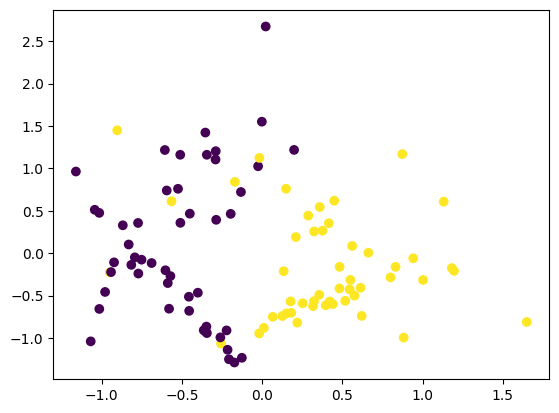

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(
n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
#convert to dataFrame
X=pd.DataFrame(X,columns=["feat1", "feat2"])
y=pd.Series(y)

#train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Classification Dataset Shapes:",X_train.shape,X_test.shape)

Classification Dataset Shapes: (70, 2) (30, 2)


In [ ]:
dec_tree=DecisionTree(criterion='entropy',max_depth=3)
dec_tree.fit(X_train,y_train)

In [ ]:
dec_tree.plot()

?(feat1 <= 0.043777523046321265)
  Y:      ?(feat1 <= -0.2719820102947444)
       Y:           ?(feat2 <= 1.3334978201484127)
            Y: 0
            N: 1
       N:           ?(feat2 <= 0.9333615379672247)
            Y: 0
            N: 0
  N:      ?(feat2 <= 0.9891772599637711)
       Y: 1
       N: 0


In [ ]:
dec_tree.predict(X_test)

,0
83,1
53,0
70,0
45,1
44,1
39,1
22,0
80,1
10,0
0,1


In [ ]:
for criteria in ["entropy", "gini_index"]:
    tree=DecisionTree(criterion=criteria)  #
    tree.fit(X_train,y_train)
    y_hat=tree.predict(X_test)
    tree.plot()
    print("Criteria :",criteria)
    print("Accuracy:",accuracy(y_hat,y_test))
    for cls in y_test.unique():
        print("Class:",cls)
        print("Precision: ",precision(y_hat, y_test, cls))
        print("Recall: ",recall(y_hat, y_test, cls))   #classifiction task cant use RMSE, or MAE

?(feat1 <= 0.043777523046321265)
  Y:      ?(feat1 <= -0.2719820102947444)
       Y:           ?(feat2 <= 1.3334978201484127)
            Y:                ?(feat1 <= -0.9462313266558616)
                 Y:                     ?(feat1 <= -0.964783215354998)
                      Y: 0
                      N: 1
                 N: 0
            N: 1
       N:           ?(feat2 <= 0.9333615379672247)
            Y:                ?(feat1 <= -0.07272264344274099)
                 Y:                     ?(feat1 <= -0.23954652172942484)
                      Y: 1
                      N: 0
                 N: 1
            N: 0
  N:      ?(feat2 <= 0.9891772599637711)
       Y: 1
       N: 0
Criteria : entropy
Accuracy: 0.8333333333333334
Class: 1
Precision:  0.8571428571428571
Recall:  0.8
Class: 0
Precision:  0.8125
Recall:  0.8666666666666667
?(feat1 <= 0.043777523046321265)
  Y:      ?(feat1 <= -0.2719820102947444)
       Y:           ?(feat1 <= -0.8600238718805469)
            Y:     

2(b) K-FOLD SPLIT

In [ ]:
import numpy as np

#splitting into fold (k-1) folds for train and one for test
def kfold_split(X, y, k=5, seed=42):
    np.random.seed(seed)
    indices=np.arange(len(X))
    np.random.shuffle(indices)
    fold_sizes=[len(X) // k] * k
    for i in range(len(X) % k):
        fold_sizes[i]+=1

    folds=[]
    start=0
    for size in fold_sizes:
        end=start+size
        folds.append(indices[start:end])
        start=end
    return folds


In [ ]:
# from metrics import accuracy, precision, recall

def cross_val_nested(X, y, max_depth_candidates=range(1, 11), k=5, criterion="information_gain"):
    folds=kfold_split(X, y, k)
    outer_acc,outer_prec,outer_rec,best_depths = [], [], [], []

    for i in range(k):
        #for each fold, setting up test and train => [train,train,train,train,train,test]
        test_indices=folds[i]
        train_indices=np.concatenate([folds[j] for j in range(k) if j != i])

        X_train,y_train=X.iloc[train_indices],y.iloc[train_indices]
        X_test,y_test=X.iloc[test_indices],y.iloc[test_indices]

        #Inner fold creation to not overfit to this sequence of folds in train => [train1,train2,train3,val] => shufffle these folds to get a more general training alg
        inner_folds=kfold_split(X_train, y_train, k)
        depth_scores={}

        for d in max_depth_candidates:
            inner_acc_scores=[]
            for j in range(k):
                val_idx = inner_folds[j]
                inner_train_idx = np.concatenate([inner_folds[m] for m in range(k) if m != j])

                X_inner_train, y_inner_train = X_train.iloc[inner_train_idx], y_train.iloc[inner_train_idx]
                X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

                model = DecisionTree(criterion=criterion, max_depth=d)
                model.fit(X_inner_train, y_inner_train)
                y_pred = model.predict(X_val)

                inner_acc_scores.append(accuracy(y_val,y_pred))  #taking the metrucs to find the best one

            depth_scores[d] = np.mean(inner_acc_scores) #mean to find the score for a particular depth

        #take best depth => max accuraacy score
        best_depth=max(depth_scores,key=depth_scores.get)
        best_depths.append(best_depth)

        #train with best depth on outer training data
        model=DecisionTree(criterion=criterion,max_depth=best_depth)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        #collect metrics
        outer_acc.append(accuracy(y_test, y_pred))
        for i in y_test.unique():
          outer_prec.append(precision(y_test, y_pred,i))
          outer_rec.append(recall(y_test, y_pred,i))

    return {
        "mean_accuracy": np.mean(outer_acc),
        "mean_precision": np.mean(outer_prec, axis=0),
        "mean_recall": np.mean(outer_rec, axis=0),
        "best_depths": best_depths
    }


In [ ]:
cross_val_nested(X,y)

{'mean_accuracy': np.float64(0.9),
 'mean_precision': np.float64(0.9016161616161616),
 'mean_recall': np.float64(0.904318181818182),
 'best_depths': [1, 2, 1, 1, 1]}

In [ ]:
et_d_tree=DecisionTree(max_depth=1,criterion="information_gain")

In [ ]:
et_d_tree.fit(X_train,y_train)

In [ ]:
yh_test=et_d_tree.predict(X_test)

In [ ]:
accuracy(y_test,yh_test)

np.float64(0.9333333333333333)

Q3

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, delim_whitespace=True, header=None,
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                        "acceleration", "model year", "origin", "car name"])

data

/tmp/ipython-input-891556509.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None,


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
import requests
import pandas as pd
from io import StringIO

response = requests.get(url, verify=False)  # disable SSL verification
data = pd.read_csv(StringIO(response.text), sep=r"\s+", header=None, names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                        "acceleration", "model year", "origin", "car name"])

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
print(data)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   
4    17.0          8         302.0      140.0  3449.0          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
396  28.0          4         120.0      79.00  2625.0          18.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [ ]:
print(data.shape)

(398, 9)


In [ ]:
print(data.isnull().sum()) #any cols not filled

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
print(data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


yes, so float64s and int64s are handled well, okay horsepower is an objcet???


In [ ]:
data.duplicated().sum()

np.int64(0)

no duplicates okay. will be making the tree now


In [ ]:
for i in data.columns:
    i,data[i].unique()


In [ ]:
data['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
data=data[data['horsepower']!='?'].reset_index(drop=True)
data['horsepower']=data['horsepower'].astype(float)


In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [ ]:
X_data=data.iloc[:,1:8].reset_index(drop=True)
y_data=data["mpg"]

In [ ]:
for criteria in ["mse"]:
    tree = DecisionTree(criterion=criteria, max_depth=5)  #Split based
    tree.fit(X_data, y_data)
    y_hat = tree.predict(X_data)
    tree.plot()
    print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y_data))
    print("MAE: ", mae(y_hat, y_data))
    # print("Accuracy", accuracy(y_hat,y_data))

?(cylinders)
  8:      ?(cylinders)
       8:           ?(cylinders)
            8:                ?(cylinders)
                 8:                     ?(cylinders)
                      8: 14.963106796116506
  4:      ?(cylinders)
       4:           ?(cylinders)
            4:                ?(cylinders)
                 4:                     ?(cylinders)
                      4: 29.28391959798995
  6:      ?(cylinders)
       6:           ?(cylinders)
            6:                ?(cylinders)
                 6:                     ?(cylinders)
                      6: 19.973493975903615
  3:      ?(cylinders)
       3:           ?(cylinders)
            3:                ?(cylinders)
                 3:                     ?(cylinders)
                      3: 20.55
  5:      ?(cylinders)
       5:           ?(cylinders)
            5:                ?(cylinders)
                 5:                     ?(cylinders)
                      5: 27.366666666666664
Criteria : mse
RMSE: 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_val = mean_squared_error(y_data, y_hat)
rmse_val = np.sqrt(mse_val)  # take square root manually
mae_val = mean_absolute_error(y_data, y_hat)
r2_val = r2_score(y_data, y_hat)

print("RMSE:", rmse_val)
print("MAE:", mae_val)
print("R2:", r2_val)



RMSE: 4.668742866549878
MAE: 3.4943649335606763
R2: 0.6412742329799173


In [ ]:
X_data.isin(['?']).sum()


,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


RMSE: 2.178138849149237
MAE: 1.5952216438662674


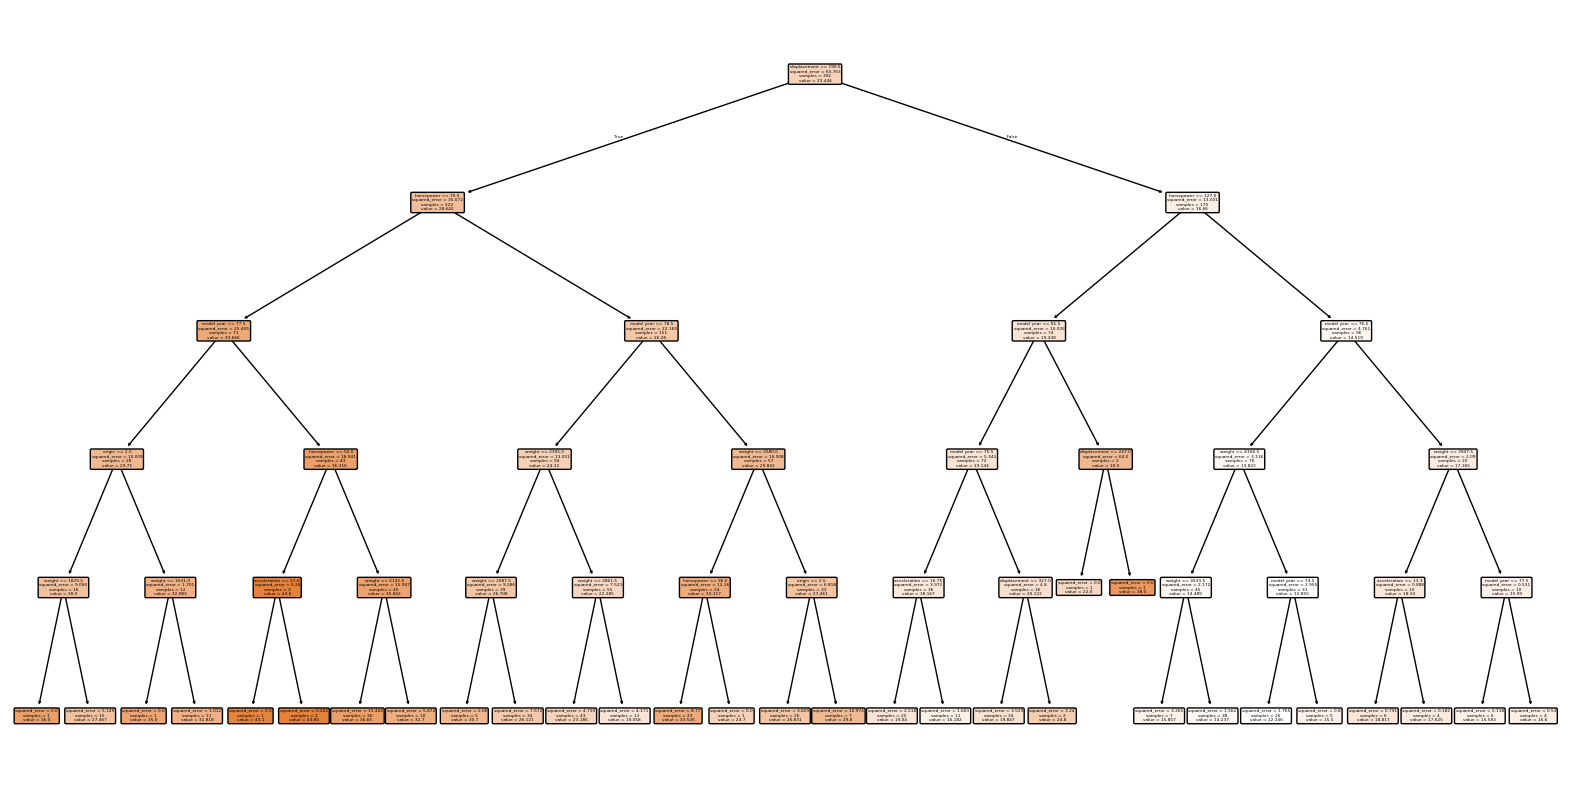

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

tree=DecisionTreeRegressor(max_depth=5,random_state=42)

#fitting
tree.fit(X_data, y_data)

#preds
y_hat = tree.predict(X_data)

#metrics
rmse_val = np.sqrt(mean_squared_error(y_data, y_hat))
mae_val = mean_absolute_error(y_data, y_hat)

print("RMSE:", rmse_val)
print("MAE:", mae_val)

#visualize just to get an idea of the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_data.columns, filled=True, rounded=True)
plt.show()


Q4

In [ ]:
import time

In [ ]:
def make_fake_data(N,M,input_type="discrete",output_type="discrete"):
    if input_type=="discrete":
        X=pd.DataFrame(np.random.randint(0,3,size=(N,M)),columns=[f"X{i}" for i in range(M)])
    else:  #real ip
        X=pd.DataFrame(np.random.randn(N,M),columns=[f"X{i}" for i in range(M)])
    if output_type=="discrete":
        y=pd.Series(np.random.randint(0,2,size=N))
    else:  #real op
        y=pd.Series(np.random.randn(N))

    return X,y


In [ ]:
def measure_fitting_time(tree_clss,X,y):
  ##
  start=time.time()
  tree= tree_clss
  tree.fit(X,y)
  end=time.time()
  fit_time=(end-start)

  ## pred time
  start=time.time()
  tree.predict(X)
  end=time.time()
  pred_time=(end-start)

  return fit_time,pred_time


Running: Discrete In,Discrete Out
Running: Real In,Discrete Out
Running: Discrete In,Real Out
Running: Real In,Real Out
Plotting:Discrete In,Discrete Out


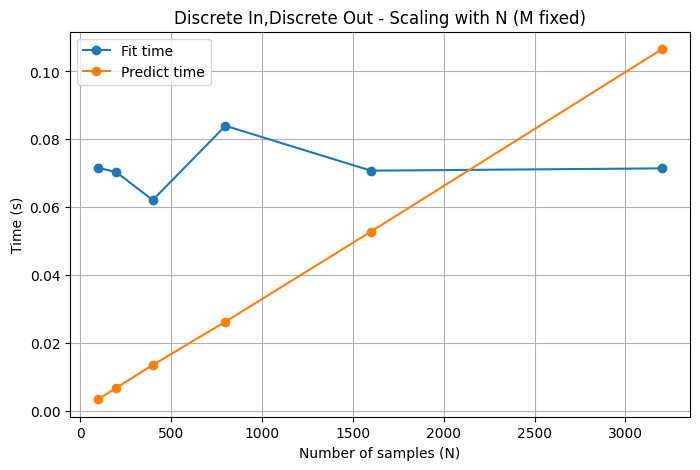

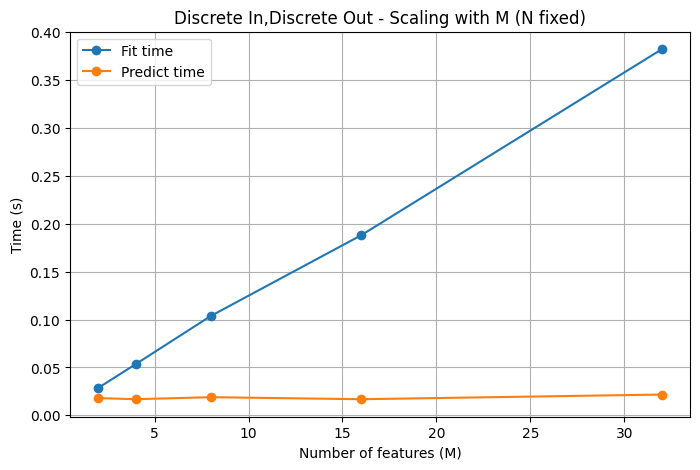

Plotting:Real In,Discrete Out


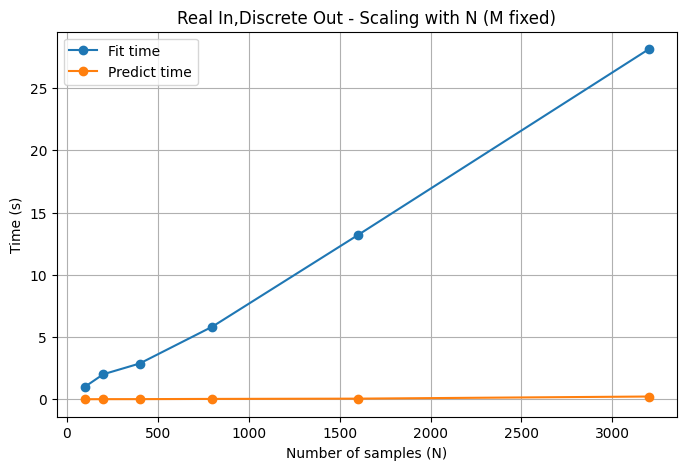

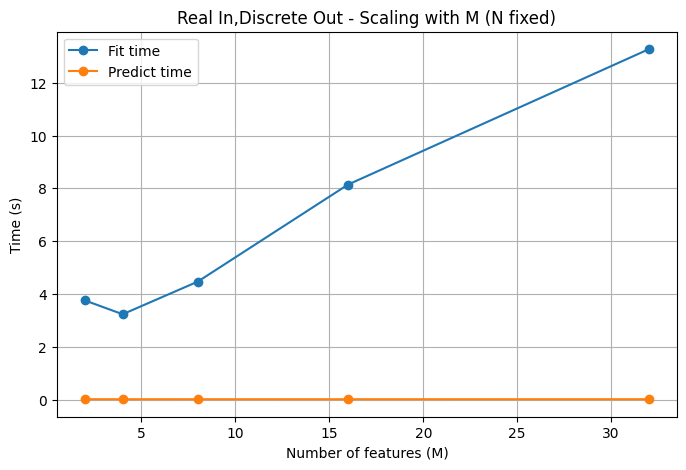

Plotting:Discrete In,Real Out


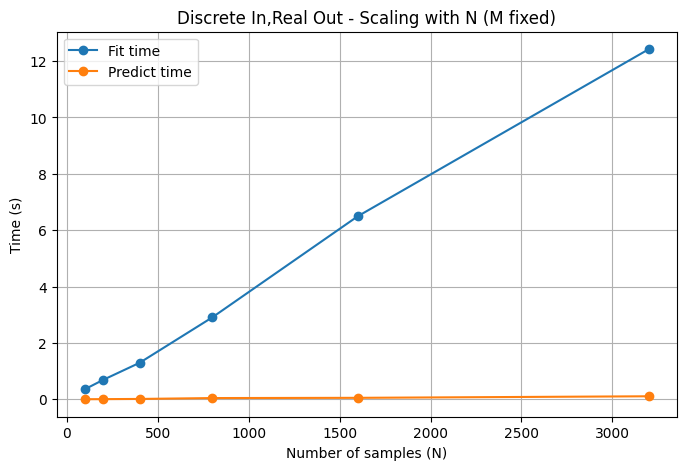

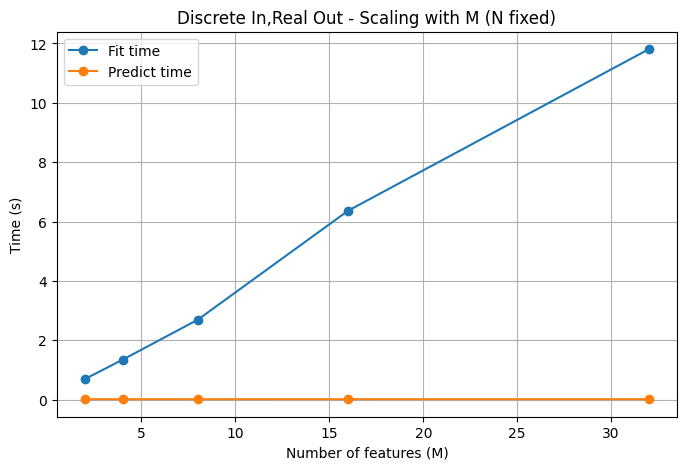

Plotting:Real In,Real Out


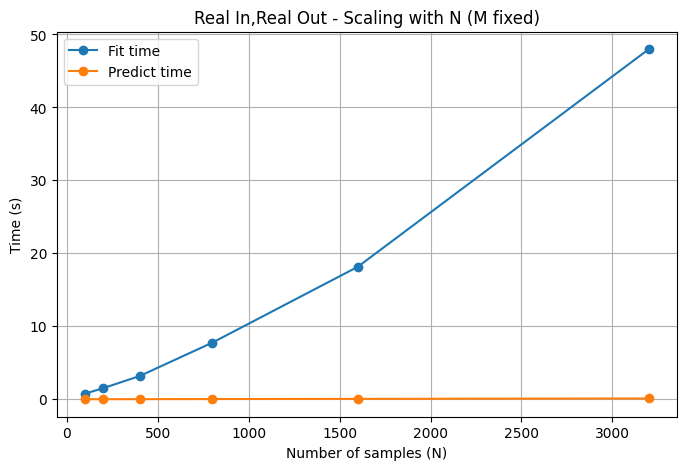

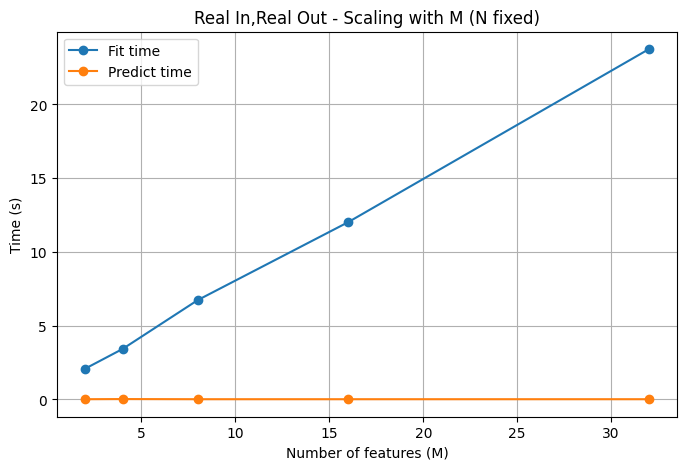

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

#the diff N and M, we're taking
Ns=[100,200,400,800,1600,3200]
Ms=[2,4,8,16,32]
max_depth=5

tree_cases=[("Discrete In,Discrete Out","discrete","discrete"),("Real In,Discrete Out","real","discrete"),("Discrete In,Real Out","discrete", "real"),("Real In,Real Out", "real", "real")]

results_all={}

#all cases at once
for case_name,in_type,out_type in tree_cases:
    print(f"Running: {case_name}") #need to see what is running without just waitiming aimlessly
    results_all[case_name]={"Nchange":[],"Mchange":[]} #a list of lists-> containing varying Ms and Ns for a particular tree

    fixed_m=5
    for N in Ns: #foreach n
        X,y=make_fake_data(N,fixed_m,in_type,out_type)
        tree=DecisionTree(criterion="information_gain", max_depth=max_depth)
        fit_time,predict_time=measure_fitting_time(tree, X, y)
        results_all[case_name]["Nchange"].append((N,fixed_m,fit_time,predict_time))

    fixed_n=500
    for M in Ms: #foreach m
        X,y=make_fake_data(fixed_n,M,in_type, out_type)
        tree=DecisionTree(criterion="information_gain", max_depth=max_depth)
        fit_time,predict_time=measure_fitting_time(tree,X,y)
        results_all[case_name]["Mchange"].append((fixed_n,M,fit_time,predict_time))


#plotting all the 8 plots=> (4 cases * 2 varies)
for case_name in results_all.keys():
    print(f"Plotting:{case_name}") #to check

    Ns=[r[0] for r in results_all[case_name]["Nchange"]]
    fit_times_N=[r[2] for r in results_all[case_name]["Nchange"]]
    predict_times_N=[r[3] for r in results_all[case_name]["Nchange"]]

    plt.figure(figsize=(8,5))
    plt.plot(Ns,fit_times_N,marker="o",label="Fit time")
    plt.plot(Ns,predict_times_N,marker="o",label="Predict time")
    plt.xlabel("Number of samples (N)")
    plt.ylabel("Time (s)")
    plt.title(f"{case_name} - Scaling with N (M fixed)")
    plt.legend()
    plt.grid(True)
    plt.show()

    Ms=[r[1] for r in results_all[case_name]["Mchange"]]
    fit_times_M=[r[2] for r in results_all[case_name]["Mchange"]]
    predict_times_M=[r[3] for r in results_all[case_name]["Mchange"]]

    plt.figure(figsize=(8,5))
    plt.plot(Ms,fit_times_M, marker="o",label="Fit time")
    plt.plot(Ms,predict_times_M,marker="o",label="Predict time")
    plt.xlabel("Number of features (M)")
    plt.ylabel("Time (s)")
    plt.title(f"{case_name} - Scaling with M (N fixed)")
    plt.legend()
    plt.grid(True)
    plt.show()
